### 1. Import Dependencies

In [2]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.utils import load_img
from matplotlib import pyplot as plt
from sklearn.utils import resample
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint
import numpy as np
import warnings
import cv2
import tensorflow as tf
warnings.filterwarnings("ignore")
path = '../monet2photo/'

### 2. Utils Functions

In [3]:
# plot the image, its translation, and the reconstruction
def show_plot_1(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	# print(images)
	images = (images + 1) / 2.0
	print(len(images))
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i],fontsize=15, color= 'black', fontweight='bold')
	pyplot.show()


In [4]:
def cv2_plot(img,title):
    cv2.imshow(title, img)
    cv2.waitKey()
    cv2.destroyAllWindows()

### Load Models

In [ ]:
# load the models
from tensorflow_addons.layers import InstanceNormalization
cust = {'InstanceNormalization': InstanceNormalization}
model_monet_to_photo = load_model('../Models/g_model_AtoB_001072.h5', cust)
model_photo_to_monet = load_model('../Models/g_model_BtoA_001072.h5', cust)

### Load Images

In [6]:
monet = cv2.imread('../monet2photo/testA/00050.jpg')
photo = cv2.imread("../monet2photo/testB/2014-08-01 17_41_55.jpg")

In [7]:
# Check shape of the image
monet.shape, photo.shape

((256, 256, 3), (256, 256, 3))

In [ ]:
# normalize the images
monet_data_scal = (monet - 127.5) / 127.5
photo_data_scal = (photo - 127.5) / 127.5

### Dispaly input images

(-0.5, 255.5, 255.5, -0.5)

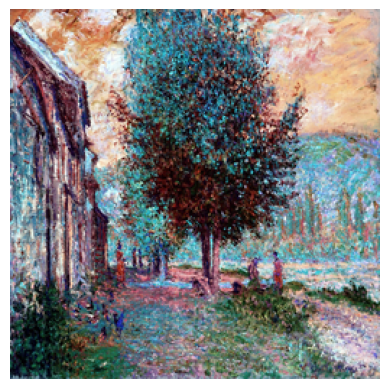

In [8]:
# plot monet paiting
plt.imshow(monet)
plt.axis('off')

In [9]:
cv2_plot(monet,"monet photo")

(-0.5, 255.5, 255.5, -0.5)

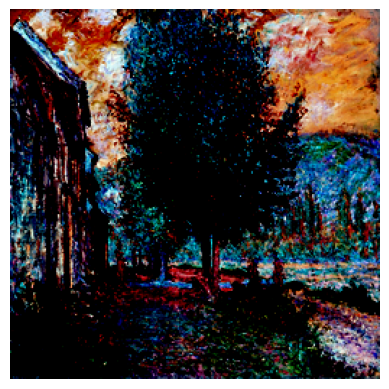

In [10]:
plt.imshow(monet_data_scal)
plt.axis('off')

In [11]:
cv2_plot(monet_data_scal,"monet scale")

(-0.5, 255.5, 255.5, -0.5)

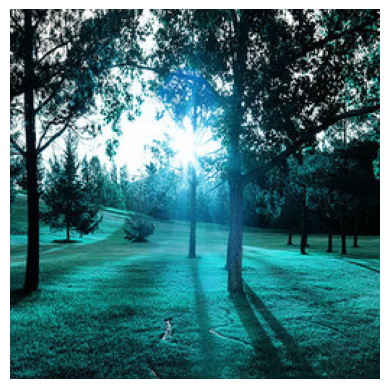

In [12]:
plt.imshow(photo)
plt.axis('off')

In [13]:
cv2_plot(photo,"photo")

(-0.5, 255.5, 255.5, -0.5)

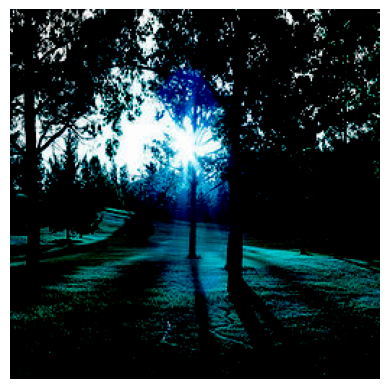

In [14]:
plt.imshow(photo_data_scal)
plt.axis('off')

In [15]:
cv2_plot(photo_data_scal,"photo scale")

### Predict to Monet Generation

1/1 [==============================] - 6s 6s/step
3


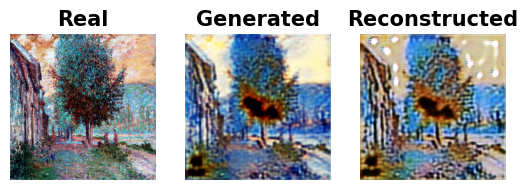

In [16]:
# plot A->B->A (Monet to photo to Monet)
scal_data = tf.expand_dims(monet_data_scal, axis=0)
photo_generated  = model_monet_to_photo.predict(scal_data)
monet_reconstructed = model_photo_to_monet.predict(photo_generated)
show_plot_1(scal_data, photo_generated, monet_reconstructed)

In [25]:
# generated photo from monet
cv2_plot(photo_generated[0], "photo generated")

In [ ]:
# generate monet from generated photo
cv2_plot(monet_reconstructed[0], "monet reconstruct")